In [16]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
school_survey = pd.read_csv('../../data/math/36423-0001-Data.tsv',sep='\t')
student_survey = pd.read_csv('../../data/math/36423-0002-Data.tsv',sep='\t')
school_survey.shape, student_survey.shape

((944, 687), (23503, 6608))

In [18]:
school_survey.head()

,SCH_ID,X1NCESID,W1SCHOOL,STRAT_ID,PSU,X1CONTROL,X1LOCALE,X1REGION,X1CENDIV,X1STATESAMPL,X1STATE,X1GRADESPAN,X1FREELUNCH,X1REPEAT9TH,X1SCHAMIND,X1SCHASIAN,X1SCHBLACK,X1SCHHISP,X1SCHWHITE,X1SCHOOLCLI,X1COUPERTEA,X1COUPERCOU,X1COUPERPRI,X1AQSTAT,X1AQDATE,X1AQDESIGNEE,X1CQSTAT,X1CQDATE,A1GRADEPREK,A1GRADEK,A1GRADE1,A1GRADE2,A1GRADE3,A1GRADE4,A1GRADE5,A1GRADE6,A1GRADE7,A1GRADE8,A1GRADE9,A1GRADE10,A1GRADE11,A1GRADE12,A1GRADE13,A1UNGRADED,A1SCHCONTROL,A1RELIGIOUS,A1RELIGTYPE,A1SINGLESEX,A1SCHTYPE,A1SCHSPFOCUS,A1CHOICEPROG,A1CHOICEIN,A1CHOICEOUT,A1CHOICESCH,A1CHOICEPRIV,A1CHOICEOTHR,A1YRROUND,A1CALENDAR,A1SCHEDULE,A1TRADMINS,A1ACADBLOCK,A1VOCBLOCK,A1OTHRBLOCK,A1ABLOCKMINS,A1VBLOCKMINS,A1OBLOCKMINS,A1CLASSHRS,A1ADA,A1NOTIFY,A1TRANSFRALT,A1AYP,A1AYPYR,A1MADEAYP,A1MTHSCIFAIR,A1MSSUMMER,A1MSAFTERSCH,A1MSMENTOR,A1MSSPEAKER,A1MSFLDTRIP,A1MSPRGMS,A1MESA,A1MSPDLEARN,A1MSPDINTRST,A1MSOTHER,A1MSNONE,A1G9SUMMER,A1G9OVERAGE,A1G9COMMUNTY,A1G9BLOCKSCH,A1G9DOUBLE,A1G9STUDY,A1G9TEACHER,A1G9TUTOR,A1G9OTHRPROG,A1G9NOPROG,A1G9ABSENTEE,A1G9GRADES,A1G9BEHIND,A1G9BEHAVE,A1G9TCHREF,A1G9CNSLREF,A1G9PRNTREF,A1G9REQUEST,A1G9OTHER,A1CAPACITY,A1OFFERALT,A1OFFERDOPRV,A1OFFERAP,A1OFFERNONE,A1FREELUNCH,A1ELL,A1SPECIALED,A1ALTPROG,A1DROPOUTPRV,A1AP,A1HISPSTU,A1WHITESTU,A1BLACKSTU,A1ASIANPISTU,A1AMINDIANST,A1REPEATG9,A1RETURN09,A14YRDEGREE,A12YRDEGREE,A1WORK,A1MILITARY,A1DIDOTHER,A1FTTCHRS,A1PTTCHRS,A1FTMTCHRS,A1PTMTCHRS,A1FTSTCHRS,A1PSCTCHRS,A1FTOTHTCHRS,A1PTOTHTCHRS,A1CERTFTMTCH,A1CERTPTMTCH,A1CERTFTSTCH,A1CERTPTSTCH,A1MSRECRUIT,A1FILLMTH,A1FILLSCI,A1MINCENTIVE,A1SINCENTIVE,A1MTNORETURN,A1STNORETURN,A1ABSENTTCHR,A1ONPREALG,A1ONRMTH,A1ONINTMTH1,A1ONINTMTH2,A1ONALGP1P2,A1ONALG1,A1ONALG2,A1ONGEOM,A1ONTRIG,A1ONALG3,A1ONANGEOM,A1ONCLC,A1ONCLCAPAB,A1ONCLCAPBC,A1ONCLCAPIB,A1ONCMPSCI,A1ONCMPSCIA,A1ONCMPSCIB,A1ONSTATS,A1ONSTATSAP,A1OFFPREALG,A1OFFRMTH,A1OFFINTMTH1,A1OFFINTMTH2,A1OFFALGP1P2,A1OFFALG1,A1OFFALG2,A1OFFGEOM,A1OFFTRIG,A1OFFALG3,A1OFFANGEOM,A1OFFCLC,A1OFFCLCAPAB,A1OFFCLCAPBC,A1OFFCMPSCI,A1OFFCLCAPIB,A1OFFMPSCIA,A1OFFCMPSCIB,A1OFFSTATS,A1OFFSTATSAP,A1NOMTHO,A1ONGENSCI,A1ONPHYSCI,A1ONERTHSCI,A1ONENVSCI,A1ONTECH,A1ONBIO1,A1ONLIFESCI,A1ONCHEM1,A1ONPHYS1,A1ONINTGSCI1,A1ONINTGSCI2,A1ONANATOMY,A1ONENVAP,A1ONADVBIO,A1ONADVCHEM,A1ONADVPHYS,A1ONOTHBIO,A1ONOTHPSCI,A1ONOTHESCI,A1OFFGENSCI,A1OFFPHYSCI,A1OFFERTHSCI,A1OFFTECH,A1OFFBIO1,A1OFFLSCI,A1OFFCHEM1,A1OFFPHYS1,A1OFFINTSCI1,A1OFFINTSCI2,A1OFFENVSCI,A1OFFANATOMY,A1OFFENVAP,A1OFFADVBIO,A1OFFADVCHEM,A1OFFADVPHYS,A1OFFOTHPSCI,A1OFFOTHBIO,A1OFFOTHESCI,A1NOSCIO,A1IB,A1MTHREQS,A1MTHSTREQ,A1SCIREQS,A1SCISTREQ,A1ALG1LEVELS,A1SEX,A1HISP,A1WHITE,A1BLACK,A1ASIAN,A1PACISLE,A1AMINDIAN,A1HIDEG,A1HIMAJV,A1HIMAJ6,A1HIMAJ2,A1BAMAJV,A1BAMAJ6,A1BAMAJ2,A1STARTDEG,A1MANAGEMENT,A1ALTPREP,A1CERTIFIED,A1YRSADMIN,A1YRSHSLSSCH,A1TEACHING,A1YRSMSTCHR,A1YRSHSTCHR,A1MSSUBJECT,A1HSSUBJECT,A1HRTEACHERS,A1HRINTMGMNT,A1HREXTMGMNT,A1HRDISCIPLN,A1HRMONITOR,A1HRTEACHING,A1HRPARENT,A1HRSTUDENT,A1HRPAPERWK,A1HROTH,A1TARDY,A1STUABSENT,A1CUT,A1TCHRABSENT,A1DROPOUT,A1APATHY,A1PRNTINV,A1UNPREP,A1HEALTH,A1RESOURCES,A1CONFLICT,A1ROBBERY,A1VANDALISM,A1DRUGUSE,A1ALCOHOL,A1DRUGSALE,A1WEAPONS,A1PHYSABUSE,A1TENSION,A1BULLY,A1VERBAL,A1MISBEHAVE,A1DISRESPECT,A1GANG,C1FTCNSL,C1PTCNSL,C1FTCERTCNSL,C1PTCERTCNSL,C1CASELOAD,C1ASSIGNMENT,C1HRSSCHED,C1HRSCOLLEGE,C1HRSCAREER,C1HRSDEVELOP,C1HRSJOBSKLL,C1HRSPROBLEM,C1HRSTESTING,C1HRSNONCNSL,C1HRSOTHCNSL,C1GOAL1,C1GOAL2,C1GOAL3,C1DISCIPLINE,C1G9LOWEST,C1TRANSCNSL,C1TRANSCRS,C1TRANPRNT,C1TRANPLCY,C1TRANPRES,C1TRANCOTH,C1TRANNOT,C1TRANSTUDPR,C1TRANSTFFPR,C1TRANVISIT,C1TRANCLASS,C1TRANADMIN,C1TRANTCHRS,C1TRANBUDDY,C1TRANLRNCOM,C1TRANSUMMER,C1TRANFALL,C1TRANSOTH,C1TRANNONE,C1PLAN,C1PLANPARENT,C1SIGNOFF,C1TECHSUPPRT,C1STAFFENRCH,C1GIFTED,C1ENRICHMENT,C1APCOURSE,C1SCHOLARSHP,C1SUMMER,C1OTHSUPPORT,C1NOSUPPORT,C1GETAHEAD,C1STRUGGLE,C1AVERAGE,C1HIGH,C1TUTOR,C1STAFF,C1PULLOUT,C1CREDREC,C1HOMEWORK,C1OUTSIDE,C1OTHRASSIST,C1NOASSIST,C1PURSUE,C1INFORM,C1ENCCLG,C1INDEPSTUDY,C1ONLINE,C1OTHERHS,C1TECH,C1COMCLG,C14YRCLG,C1OTHERWAY,C1NOWAY,C1MCOMPTST,C

In [19]:
student_survey.head()

CASEID  STU_ID  SCH_ID  X1NCESID  X2NCESID  STRAT_ID  PSU  X2UNIV1  \
0       1   10001      -5        -5        -5        -5   -5       11   
1       2   10002      -5        -5        -5        -5   -5       11   
2       3   10003      -5        -5        -5        -5   -5       11   
3       4   10004      -5        -5        -5        -5   -5       10   
4       5   10005      -5        -5        -5        -5   -5       11   

   X2UNIV2A  X2UNIV2B  X3UNIV1   W1STUDENT    W1PARENT   W1MATHTCH  \
0         1         1     1111  375.667105  470.250141  423.238620   
1         1         1     1111  189.309446  224.455466  329.640843   
2         1         1     1111  143.591863  185.301339  231.718703   
3         1         7     1001  227.937019  301.431713  261.518593   
4         1         1     1111  145.019401  190.834136  169.946035   

     W1SCITCH   W2STUDENT     W2W1STU    W2PARENT      W2W1PAR   W3STUDENT  \
0  393.169508  365.607062  363.091114  860.151671  1087.442922  392.215779   
1  207.892322  196.338045  193.466338  565.897915   632.713977  236.571468   
2    0.000000  137.678887  141.015287  309.894693   418.108492  148.736833   
3  306.102816    0.000000    0.000000  470.412495     0.000000    0.000000   
4  188.432535  134.566242  135.640155  410.207175   551.201370  152.708389   

      W3W1STU   W3W1W2STU     W3W2STU   W3HSTRANS  W3STUDENTTR   W3W1STUTR  \
0  393.966458  401.342913  379.656157  353.724466   378.525955  423.160870   
1  236.797914  233.815767  204.172391  187.999458   244.005181  231.118368   
2  163.715422  176.052593  149.309699  133.911110   145.892926  156.726517   
3    0.000000    0.000000    0.000000  227.845919     0.000000    0.000000   
4  154.910087  157.508426  143.961105  132.164709   147.835235  153.259805   

   W3W1W2STUTR   W3W2STUTR  X1SEX  X1RACE  X1HISPANIC  X1WHITE  X1BLACK  \
0   411.922366  403.128362      1       8           0        1        0   
1   235.221482  227.941270      2       8           0        1        0   
2   173.895502  152.100635      2       3           0        0        1   
3     0.000000    0.000000      2       8           0        1        0   
4   157.286123  144.747939      1       8           0        1        0   

   X1ASIAN  X1PACISLE  X1AMINDIAN  X1HISPTYPE  X1ASIANTYPE  X1NATIVELANG  \
0       -5         -5          -5          -5           -5            -5   
1       -5         -5          -5          -5           -5            -5   
2       -5         -5          -5          -5           -5            -5   
3       -5         -5          -5          -5           -5            -5   
4       -5         -5          -5          -5           -5            -5   

   X1DUALLANG  X1STDOB  X1TXMTH  X1TXMSEM  X1TXMSCR  X1TXMTSCOR  X1TXMQUINT  \
0           1   199502   0.8304    0.2549   50.4919     59.3710           5   
1           1   199511  -0.2956    0.2696   35.8045     47.6821           2   
2           1   199506   1.2997    0.2555   56.0477     64.2431           5   
3           1   199505  -0.1427    0.2649   38.0888     49.2690           3   
4           1   199505   1.1405    0.2312   54.1762     62.5897           5   

   X1TXMPROF1  X1TXMPROF2  X1TXMPROF3  X1TXMPROF4  X1TXMPROF5  X1MACC  \
0      0.9997      0.9669      0.8976      0.3126      0.1013       0   
1      0.9714      0.5204      0.1768      0.0582      0.0512      -8   
2      1.0000      0.9914      0.9838      0.6606      0.2001       0   
3      0.9843      0.6416      0.2459      0.0662      0.0531       0   
4      0.9999      0.9863      0.9686      0.5385      0.1551       0   

   X1PARRESP  X1P1RELATION  X1PAR1EDU  X1PAR1EMP  X1PAR1OCC2  X1PAR1OCC6  \
0          1             2          5          4          21          -5   
1          1             1          3          3          43          -5   
2          1             1          7          4          21          -5   
3          1            15          4          2          11          -5   
4  

## Student variables: 
* (i) student demographics (race, ethnicity, gender); -> X1RACE, X1SEX, S1LANG1ST
* (ii) self-efficacy in math; -> X1MTHEFF
* (iii) student aspiration in future math classes; -> S1MUSEJOB
* (iv) student beliefs and stereotypes on math (e.g., “Do you agree that if you spend a lot of time and effort in your math and science classes, you won’t be popular?”); -> S1TEPOPULAR
    
Parent and family characteristics:
* (i) parents’ social class; -> P1MARSTAT, P2MARSTAT, X1FAMINCOME
* (ii) parents’ profession (STEM or non-STEM); -> X1PAR1EDU, X1PAR2EDU, X1PAR1OCC2, X1PAR2OCC2, X1PAR1OCC_STEM1, X1PAR2OCC_STEM1, X1PAR1EMP, X1PAR2EMP
* (iii) aspirations for their child;
* (iv) perceptions of child’s talent in STEM;
* (v) STEM related enrichment activities they engage in with their child. P1STEMDISC, P2STEMDISC
    
Performance variables:
* (i) 8th grade end of year final math grade; -> S1M8GRADE
* (ii) standardized math test score in 9th grade; -> X1TXMTSCOR
* (iii) standardized math test score in 12th grade. -> ??

In [20]:
check1 = student_survey['X2UNIV2A'].value_counts()
check1

1    21444
2     2059
Name: X2UNIV2A, dtype: int64

In [22]:
filter1 = student_survey[student_survey['X2UNIV2A'] == 1]
filter1.shape

(21444, 6608)

In [23]:
filter1['RACE'] = filter1['X1RACE']
filter1.loc[filter1["RACE"] == 8, "RACE"] = 'WHITE'
filter1.loc[filter1["RACE"] == 3, "RACE"] = 'BLACK'
filter1.loc[filter1["RACE"] == 4, "RACE"] = 'HISPANIC'
filter1.loc[filter1["RACE"] == 5, "RACE"] = 'HISPANIC'
filter1.loc[filter1["RACE"] == 2, "RACE"] = 'ASIAN'
filter1.loc[filter1["RACE"] == 6, "RACE"] = 'MULTIRACIAL'
filter1.loc[filter1["RACE"] == 7, "RACE"] = 'OTHER'
filter1.loc[filter1["RACE"] == 1, "RACE"] = 'NATIVE'
filter1['RACE'].value_counts()

/tmp/ipykernel_1216951/1529266921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter1['RACE'] = filter1['X1RACE']
/home/stacy/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


WHITE          11854
HISPANIC        3515
BLACK           2218
MULTIRACIAL     1912
ASIAN           1672
NATIVE           163
OTHER            110
Name: RACE, dtype: int64

In [24]:
filter1['RACE_GROUP'] = filter1['RACE']
filter1.loc[filter1["RACE"].isin(['ASIAN', 'WHITE']), "RACE_GROUP"] = 'WHITE_ASIAN'
filter1.loc[filter1["RACE"].isin(['BLACK', 'HISPANIC', 'NATIVE']), "RACE_GROUP"] = 'BLACK_HISPANIC_NATIVE'
filter1.loc[filter1["RACE"].isin(['MULTIRACIAL', 'OTHER']), "RACE_GROUP"] = 'MULTIRACIAL_OTHER'
filter1['RACE_GROUP'].value_counts()

/tmp/ipykernel_1216951/988576045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter1['RACE_GROUP'] = filter1['RACE']


WHITE_ASIAN              13526
BLACK_HISPANIC_NATIVE     5896
MULTIRACIAL_OTHER         2022
Name: RACE_GROUP, dtype: int64

In [25]:
filter2 = filter1[filter1['RACE_GROUP'] != 'MULTIRACIAL_OTHER']
filter2.shape

(19422, 6610)

In [26]:
filter2['SEX'] = filter2['X1SEX'].map({1: 'MALE', 2: 'FEMALE'})
filter2.SEX.value_counts()

/tmp/ipykernel_1216951/1786211290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter2['SEX'] = filter2['X1SEX'].map({1: 'MALE', 2: 'FEMALE'})


MALE      9862
FEMALE    9560
Name: SEX, dtype: int64

/tmp/ipykernel_1216951/3303717948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter2['X1MTHEFF'] = np.where(filter2['X1MTHEFF']>-6, filter2['X1MTHEFF'], filter2[filter2['X1MTHEFF'] > -6]['X1MTHEFF'].mean())


<AxesSubplot:>

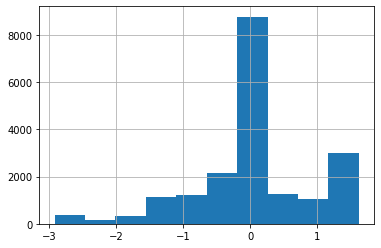

In [27]:
filter2['X1MTHEFF'] = np.where(filter2['X1MTHEFF']>-6, filter2['X1MTHEFF'], filter2[filter2['X1MTHEFF'] > -6]['X1MTHEFF'].mean())
filter2['X1MTHEFF'].hist()

In [28]:
filter2['S1MUSEJOB'] = np.where(filter2['S1MUSEJOB']>-7, filter2['S1MUSEJOB'], 0)
filter2['S1MUSEJOB'].value_counts()

/tmp/ipykernel_1216951/2991380674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter2['S1MUSEJOB'] = np.where(filter2['S1MUSEJOB']>-7, filter2['S1MUSEJOB'], 0)


2    8269
1    5969
0    2364
3    2173
4     647
Name: S1MUSEJOB, dtype: int64

In [29]:
filter2['S1TEPOPULAR'] = np.where(filter2['S1TEPOPULAR']>-9, filter2['S1TEPOPULAR'], 0)
filter2['S1TEPOPULAR'].value_counts()

/tmp/ipykernel_1216951/1334516083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter2['S1TEPOPULAR'] = np.where(filter2['S1TEPOPULAR']>-9, filter2['S1TEPOPULAR'], 0)


3    11107
4     5740
2     1442
1      570
0      563
Name: S1TEPOPULAR, dtype: int64

In [40]:
filter2 = filter2[filter2['X2X1TXMSCR'] > 0]

In [41]:
filter2['SES'] = pd.qcut(filter2['X1SES_U'],4,labels=np.arange(4) + 1)
filter2['SES'] = filter2['SES'].astype(np.int8)
filter2['HigherSES'] = (filter2['SES'] > 2).astype(int)
filter2['HigherSES'] = filter2['HigherSES'].astype(np.int8)

/tmp/ipykernel_1216951/337916923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter2['SES'] = pd.qcut(filter2['X1SES_U'],4,labels=np.arange(4) + 1)
/tmp/ipykernel_1216951/337916923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter2['SES'] = filter2['SES'].astype(np.int8)
/tmp/ipykernel_1216951/337916923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [42]:
filter2['RACE'] = filter2['RACE'].astype('category')
filter2['RACE_GROUP'] = filter2['RACE_GROUP'].astype('category')
filter2['SEX'] = filter2['SEX'].astype('category')
filter2['S1MUSEJOB'] = filter2['S1MUSEJOB'].astype('category')
filter2['S1TEPOPULAR'] = filter2['S1TEPOPULAR'].astype('category')

/tmp/ipykernel_1216951/2118610282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter2['RACE'] = filter2['RACE'].astype('category')
/tmp/ipykernel_1216951/2118610282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter2['RACE_GROUP'] = filter2['RACE_GROUP'].astype('category')
/tmp/ipykernel_1216951/2118610282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [43]:
cols = ['RACE_GROUP', 'SEX', 'S1MUSEJOB', 'S1TEPOPULAR', 'SES', 'S1LANG1ST', 'X1MTHEFF', 'S1MUSEJOB', 
        'P1MARSTAT', 'P2MARSTAT', 'X1FAMINCOME', 'X1PAR1EDU', 'X1PAR2EDU', 'X1PAR1OCC2', 'X1PAR2OCC2', 
        'X1PAR1OCC_STEM1', 'X1PAR2OCC_STEM1', 'X1PAR1EMP', 'X1PAR2EMP', 'P1STEMDISC', 'P2STEMDISC',
        'S1M8GRADE', 'X2X1TXMSCR', 'X2TXMSCR']
df = filter2[cols]
df.shape

(16887, 24)

In [44]:
df.dtypes

RACE_GROUP         category
SEX                category
S1MUSEJOB          category
S1TEPOPULAR        category
SES                    int8
S1LANG1ST             int64
X1MTHEFF            float64
S1MUSEJOB          category
P1MARSTAT             int64
P2MARSTAT             int64
X1FAMINCOME           int64
X1PAR1EDU             int64
X1PAR2EDU             int64
X1PAR1OCC2            int64
X1PAR2OCC2            int64
X1PAR1OCC_STEM1       int64
X1PAR2OCC_STEM1       int64
X1PAR1EMP             int64
X1PAR2EMP             int64
P1STEMDISC            int64
P2STEMDISC            int64
S1M8GRADE             int64
X2X1TXMSCR          float64
X2TXMSCR            float64
dtype: object

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
df['target'] = np.where(df['X2X1TXMSCR'] > df.X2X1TXMSCR.median(), 1, 0)
df['target'].value_counts()

/tmp/ipykernel_1216951/2657682949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = np.where(df['X2X1TXMSCR'] > df.X2X1TXMSCR.median(), 1, 0)


0    8444
1    8443
Name: target, dtype: int64

In [49]:
X = df.drop(columns=['X2X1TXMSCR', 'X2TXMSCR', 'target'])
y = df['target']
X.shape, y.shape

((16887, 22), (16887,))

In [56]:
X.columns

Index(['RACE_GROUP', 'SEX', 'S1MUSEJOB', 'S1TEPOPULAR', 'SES', 'S1LANG1ST',
       'X1MTHEFF', 'S1MUSEJOB', 'P1MARSTAT', 'P2MARSTAT', 'X1FAMINCOME',
       'X1PAR1EDU', 'X1PAR2EDU', 'X1PAR1OCC2', 'X1PAR2OCC2', 'X1PAR1OCC_STEM1',
       'X1PAR2OCC_STEM1', 'X1PAR1EMP', 'X1PAR2EMP', 'P1STEMDISC', 'P2STEMDISC',
       'S1M8GRADE'],
      dtype='object')

In [66]:
def train_model(X, y, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    X_train_race_group = X_train.loc[:, 'RACE_GROUP']
    X_test_race_group = X_test.loc[:, 'RACE_GROUP']
    X_train = X_train.drop(columns=['RACE_GROUP'])
    X_test = X_test.drop(columns=['RACE_GROUP'])
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)
    clf = RandomForestClassifier(max_depth=16, min_samples_leaf=3, n_estimators=100, random_state=random_state)
    clf.fit(X_train, y_train)
    test_df = pd.concat([X_test, X_test_race_group, y_test], axis=1)
    test_df['y_prediction'] = clf.predict(X_test)
    results = []
    y_true_wa, y_pred_wa = test_df[test_df.RACE_GROUP == 'WHITE_ASIAN'][['target', 'y_prediction']].T.to_numpy()
    y_true_bhn, y_pred_bhn = test_df[test_df.RACE_GROUP == 'BLACK_HISPANIC_NATIVE'][['target', 'y_prediction']].T.to_numpy()
    
    

In [106]:
def calculate_scores(test_df, class_name):
    y_true, y_pred = test_df[test_df.RACE_GROUP == class_name][['target', 'y_prediction']].T.to_numpy()
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    NUM = (tp+fp+fn+tn)
    ACC = (tp+tn)/(tp+fp+fn+tn)
    FPR = fp/(fp+tn)
    FNR = fn/(tp+fn)
    PBR = (tp+fp)/(tp+fp+fn+tn)
    return {'class_name': class_name, 'SIZE': NUM, 'PBR': PBR, 'FPR': FPR, 'FNR': FNR, 'ACC': ACC}

{'SIZE': 3599,
 'PBR': 0.5709919422061683,
 'FPR': 0.330749354005168,
 'FNR': 0.2476840565577767,
 'ACC': 0.7165879410947485}

In [110]:
tn, fp, fn, tp = confusion_matrix(y_true_bhn, y_pred_bhn).ravel()

NUM = (tp+fp+fn+tn)
ACC = (tp+tn)/(tp+fp+fn+tn)
FPR = fp/(fp+tn)
FNR = fn/(tp+fn)
PBR = (tp+fp)/(tp+fp+fn+tn)
bhn_result = {'SIZE': NUM, 'PBR': PBR, 'FPR': FPR, 'FNR': FNR, 'ACC': ACC}
bhn_result

{'SIZE': 1468,
 'PBR': 0.28610354223433243,
 'FPR': 0.16580310880829016,
 'FNR': 0.4831013916500994,
 'ACC': 0.7254768392370572}

In [117]:
res = pd.DataFrame([wa_result, bhn_result], index=['WA', 'BHN']).T
res['Difference'] = res.iloc[:, 0] - res.iloc[:, 1]
res

,WA,BHN,Difference
SIZE,3599.000000,1468.000000,2131.000000
PBR,0.570992,0.286104,0.284888
FPR,0.330749,0.165803,0.164946
FNR,0.247684,0.483101,-0.235417
ACC,0.716588,0.725477,-0.008889
